# Worksheet 19

Name: Yiwei Zha
UID: U74968240

### Topics

- Advanced Neural Networks

## Advanced Neural Networks

Nothing to do in this worksheet except follow along in lecture / use this code to better understand Neural Networks.

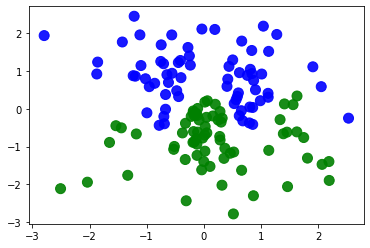

Epoch 1/200
3/3 [==============================] - 3s 7ms/step - loss: 0.6972
Epoch 2/200
3/3 [==============================] - 0s 10ms/step - loss: 0.6961
Epoch 3/200
3/3 [==============================] - 0s 12ms/step - loss: 0.6953
Epoch 4/200
3/3 [==============================] - 0s 9ms/step - loss: 0.6948
Epoch 5/200
3/3 [==============================] - 0s 3ms/step - loss: 0.6942
Epoch 6/200
3/3 [==============================] - 0s 12ms/step - loss: 0.6937
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6933
Epoch 8/200
3/3 [==============================] - 0s 5ms/step - loss: 0.6929
Epoch 9/200
3/3 [==============================] - 0s 3ms/step - loss: 0.6924
Epoch 10/200
3/3 [==============================] - 0s 22ms/step - loss: 0.6921
Epoch 11/200
3/3 [==============================] - 0s 18ms/step - loss: 0.6916
Epoch 12/200
3/3 [==============================] - 0s 22ms/step - loss: 0.6913
Epoch 13/200
3/3 [==============================] - 0s 

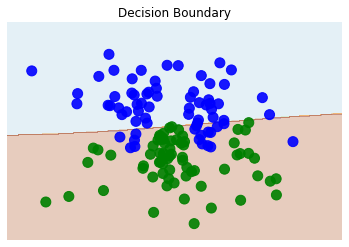

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import keras, math, random, stack
from tensorflow.keras import layers, initializers
from tensorflow.keras.activations import relu

# Set random seed for reproducibility
np.random.seed(1)
random.set_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1,
                                random_state=1)

colors = np.array([x for x in 'bgrcmyk'])

# CURVE
def generate_curve_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5, t)))
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

# The model - modify this
model = keras.models.Sequential()
model.add(layers.Dense(3, input_dim=2, activation="sigmoid"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy")

X, Y = generate_curve_data(t)

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=50, epochs=200)

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()

## Auto Encoder Example

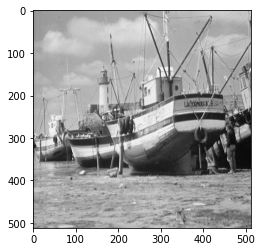

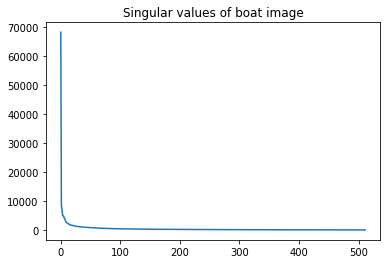

Epoch 1/500
11/11 [==============================] - 0s 1ms/step - loss: 19404.0156
Epoch 2/500
11/11 [==============================] - 0s 1ms/step - loss: 11937.8623
Epoch 3/500
11/11 [==============================] - 0s 1ms/step - loss: 7494.8877
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 6260.8745
Epoch 5/500
11/11 [==============================] - 0s 2ms/step - loss: 5910.2974
Epoch 6/500
11/11 [==============================] - 0s 1ms/step - loss: 5949.3989
Epoch 7/500
11/11 [==============================] - 0s 2ms/step - loss: 5915.6519
Epoch 8/500
11/11 [==============================] - 0s 2ms/step - loss: 5811.5762
Epoch 9/500
11/11 [==============================] - 0s 1ms/step - loss: 5889.3130
Epoch 10/500
11/11 [==============================] - 0s 1ms/step - loss: 5837.7412
Epoch 11/500
11/11 [==============================] - 0s 1ms/step - loss: 5755.2090
Epoch 12/500
11/11 [==============================] - 0s 2ms/step - loss: 5848.6660

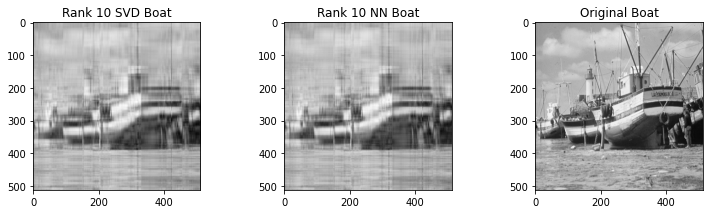

In [4]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tensorflow import keras, norm
from tensorflow.keras import layers

# Principal Component Extraction using Neural Net
#
# 
#       x[0]            x[0]' 
#          \            /
#           \          /
#            \        /
#       x[1]  \      /  x[1]'
#            \ \    / /   
#         .    \\  //    .
#         .  --- z ---   .
#         .    //  \\    .
#            / /    \ \
#      x[n-1] /      \ x[n-1]' 
#            /        \
#           /          \
#       x[n]             x[n]'
#
# where x' is the approximation of x based on the z components extracted

# MODIFY THIS LINE
RANK = 10

def custom_loss(y_true, y_pred):
    return norm(y_true - y_pred, ord='euclidean')

def frobenius(X, Y):
    return np.linalg.norm(X - Y, ord='fro')

boat = np.loadtxt('boat.dat')
plt.figure()
_ = plt.imshow(boat,cmap = cm.Greys_r)
plt.show()

u,s,vt=np.linalg.svd(boat,full_matrices=False)
_ = plt.plot(s)
plt.title('Singular values of boat image')
plt.show()

# construct a rank-RANK version of the boat
scopy = s.copy()
scopy[RANK:]=0
boatApprox = u.dot(np.diag(scopy)).dot(vt)

model = keras.models.Sequential()
model.add(layers.Dense(RANK, use_bias=False, input_dim=len(boat)))
model.add(layers.Dense(len(boat), use_bias=False))
model.compile(loss=custom_loss)

history = model.fit(boat, boat, batch_size=50, epochs=500)

boatNNApprox = model.predict(boat)

print("Frobenius Distance between boat and rank-"+str(RANK)+" approximation: ", frobenius(boat, boatApprox))
print("Frobenius Distance between boat and NN output with 1 hidden layer of "+str(RANK)+" neurons: ", frobenius(boat, boatNNApprox))

plt.figure(figsize=(12,9))
plt.subplot(1,3,1)
plt.imshow(boatApprox,cmap = cm.Greys_r)
plt.title('Rank ' + str(RANK) + ' SVD Boat')
plt.subplot(1,3,2)
plt.imshow(boatNNApprox,cmap = cm.Greys_r)
plt.title('Rank ' + str(RANK) + ' NN Boat')
plt.subplot(1,3,3)
plt.imshow(boat,cmap = cm.Greys_r)
plt.title('Original Boat')

_ = plt.subplots_adjust(wspace=0.5)
plt.show()

## CNN Example

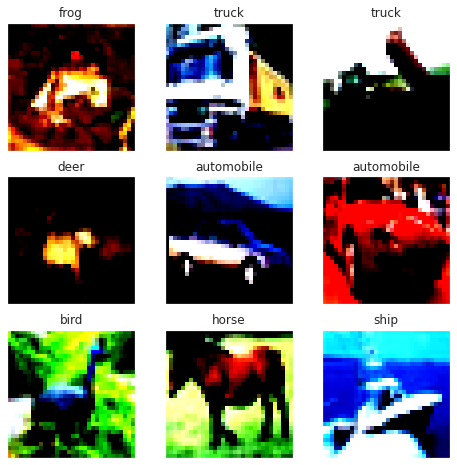

Epoch 1/10
50/50 [==============================] - 240s 5s/step - loss: 2.4372 - accuracy: 0.2115 - val_loss: 1.8931 - val_accuracy: 0.3263
Epoch 2/10
50/50 [==============================] - 232s 5s/step - loss: 1.8308 - accuracy: 0.3501 - val_loss: 1.4856 - val_accuracy: 0.4688
Epoch 3/10
50/50 [==============================] - 230s 5s/step - loss: 1.5603 - accuracy: 0.4441 - val_loss: 1.4621 - val_accuracy: 0.4880
Epoch 4/10
50/50 [==============================] - 229s 5s/step - loss: 1.3810 - accuracy: 0.5114 - val_loss: 1.3226 - val_accuracy: 0.5442
Epoch 5/10
50/50 [==============================] - 230s 5s/step - loss: 1.2413 - accuracy: 0.5669 - val_loss: 1.2329 - val_accuracy: 0.5693
Epoch 6/10
50/50 [==============================] - 228s 5s/step - loss: 1.1242 - accuracy: 0.6049 - val_loss: 1.0940 - val_accuracy: 0.6192
Epoch 7/10
50/50 [==============================] - 227s 5s/step - loss: 1.0107 - accuracy: 0.6472 - val_loss: 1.1032 - val_accuracy: 0.6219
Epoch 8/10
50

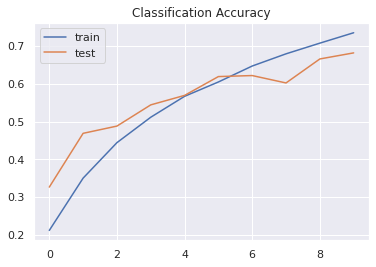

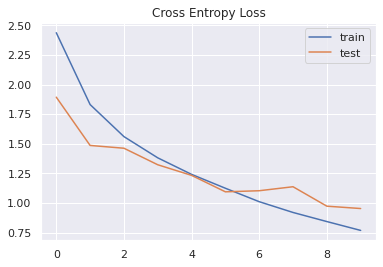

313/313 [==============================] - 13s 41ms/step


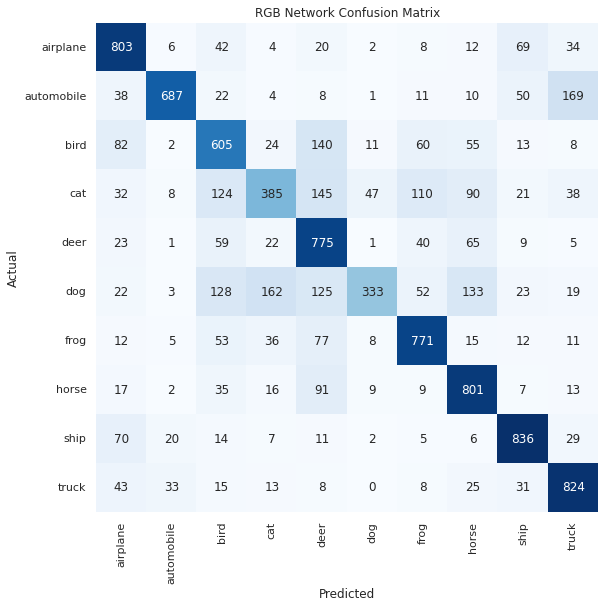

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras import utils
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
mean = np.mean(X_train, axis = (0,1,2))
std = np.std(X_train, axis = (0,1,2))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(8, 8))
index = 0
for i in range(3):
    for j in range(3):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, utils.to_categorical(y_train), epochs=10, batch_size=1000, validation_data=(X_test, utils.to_categorical(y_test)))

plt.plot(history.history["accuracy"], label='train')
plt.plot(history.history["val_accuracy"], label='test')
plt.title('Classification Accuracy')
plt.legend()
plt.show()

plt.plot(history.history["loss"], label='train')
plt.plot(history.history["val_loss"], label='test')
plt.title('Cross Entropy Loss')
plt.legend()
plt.show()


predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(predictions,axis=1))
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.title('RGB Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()